# Using Python Libraries for Well Log analytic and Machine Learning

Various libraries can be used for log analysis. They include pandas, numpy, matplotlib, etc for analysis. We would import the libraries for data manipulation.

#### In this notebook I would demonstrate how to load well log data using lasio, welly, and bruges python libraries. These libraries are built on pandas and numpy system. 

#### We would also attempt to load segy dataset.

#### Finally carryout Machine learning on the well log for insight and valuable information

In [1]:
import pandas as pd #pandas is 
import numpy as np #numpy is for ndarray analysis of data
import matplotlib.pyplot as plt #matplotlib ios for daata visualization
import lasio
import bruges as br
import segyio
from welly import Well
import seaborn as sns
#import xarray as xr
from sklearn.linear_model import lasso_path, enet_path
from scipy.interpolate import griddata, splev, splrep

## Importing of all the needed wells for analysis

In [2]:
Well1 = Well.from_las("Freeman-003ST1.las")
Well2 = Well.from_las("Freeman-004ST1.las")
Well3 = Well.from_las('Freeman-005.las')

In [3]:
Well_1 = Well1.df()
Well_1['Depth'] = Well_1.index
#Well_1 = Well_1[['GR', 'DEN', 'DT', 'RES_DEP']]
#Well_1.columns = ['GR', 'DEN', 'DT', 'RES_DEP']
Well_1.head()

,DEN,DT,GR,NEUT,RES_DEP,GENERALTIME1,DT[DERIVED]1,DEN[DERIVED]1,ACOUSTICIMPEDANCE1,REFLECTIONCOEFFICIENTS1,Depth
Depth,,,,,,,,,,,
1717.0908,NaN,NaN,12.159700,NaN,NaN,1103.383057,NaN,NaN,NaN,NaN,1717.0908
1717.2432,NaN,NaN,44.075001,NaN,NaN,1103.466675,NaN,NaN,NaN,NaN,1717.2432
1717.3956,NaN,NaN,44.075001,NaN,NaN,1103.550171,NaN,NaN,NaN,NaN,1717.3956
1717.5480,NaN,NaN,44.075001,NaN,NaN,1103.633789,NaN,NaN,NaN,NaN,1717.5480
1717.7004,NaN,NaN,43.715900,NaN,NaN,1103.717285,NaN,NaN,NaN,NaN,1717.7004


In [4]:
#wells = pd.read_csv("C:\\Users\\Toyin Obasoro\\Desktop\\Seismic\\Well Data - Copy\\trying.csv")

In [5]:
#wells.head(400)

In [6]:
Well_1 = Well_1[['Depth','GR','DEN', 'RES_DEP', 'DT', 'NEUT']]
Well_1.columns = ['Depth','GR','DEN', 'RES_DEP', 'DT', 'NEUT']
Well_1.head()

,Depth,GR,DEN,RES_DEP,DT,NEUT
Depth,,,,,,
1717.0908,1717.0908,12.159700,NaN,NaN,NaN,NaN
1717.2432,1717.2432,44.075001,NaN,NaN,NaN,NaN
1717.3956,1717.3956,44.075001,NaN,NaN,NaN,NaN
1717.5480,1717.5480,44.075001,NaN,NaN,NaN,NaN
1717.7004,1717.7004,43.715900,NaN,NaN,NaN,NaN


In [7]:
Well_1.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT
count,8214.000000,8152.000000,7963.000000,7987.000000,7891.000000,7939.000000
mean,2342.921400,86.782904,2.174444,4.889347,141.075289,0.546800
std,361.389456,18.056366,0.124344,76.781433,16.536080,0.133148
min,1717.090800,12.159700,1.347000,0.093800,51.200001,0.253500
25%,2030.006100,80.646502,2.101650,0.898000,130.600006,0.460800
50%,2342.921400,89.241150,2.192200,1.058100,138.699997,0.519800
75%,2655.836700,97.834877,2.259900,1.290250,151.500000,0.603500
max,2968.752000,125.198998,2.634200,1950.000000,209.800003,1.795600


In [8]:
Well_2 = Well2.df()
Well_2['Depth'] = Well_2.index
Well_2.head()

,DEN,DT,GR,NEUT,RES_DEP,GENERALTIME1,DT[DERIVED]1,FREEMAN-004ST1_CHECKSHOTPTXT[DERIVED]1,CORRECTEDSONIC1,INTERVALVELOCITY,...,CHECKSHOTTIME,FITCURVE,SONICADJUSTMENT,ADJUSTEDVELOCITY,ADJUSTEDTIME,RESIDUALDRIFT,DEN[DERIVED]1,ACOUSTICIMPEDANCE1,REFLECTIONCOEFFICIENTS1,Depth
Depth,,,,,,,,,,,,,,,,,,,,,
2305.6596,2.2382,137.507004,NaN,NaN,NaN,1385.471558,137.507004,2770.942871,148.268494,2055.725342,...,1385.471436,-0.412939,-0.445326,2055.729980,1385.471558,-0.369085,2.2382,4961.226074,NaN,2305.6596
2305.8120,2.2382,137.507004,NaN,NaN,NaN,1385.545654,137.507004,2771.091064,137.951218,2055.725342,...,1385.545532,-0.413161,-0.444207,2209.476807,1385.540527,-0.370288,2.2382,4961.226074,NaN,2305.8120
2305.9644,2.2382,137.507004,NaN,NaN,NaN,1385.619751,137.507004,2771.239258,137.950104,2055.725342,...,1385.619629,-0.413383,-0.443090,2209.494629,1385.609497,-0.371492,2.2382,4961.226074,NaN,2305.9644
2306.1168,2.2382,137.507004,NaN,NaN,NaN,1385.693848,137.507004,2771.387451,137.948990,2055.725342,...,1385.693726,-0.413604,-0.441977,2209.512451,1385.678467,-0.372695,2.2382,4961.226074,NaN,2306.1168
2306.2692,2.2382,137.507004,NaN,NaN,NaN,1385.767944,137.507004,2771.535645,137.947876,2055.725342,...,1385.767822,-0.413824,-0.440867,2209.530273,1385.747314,-0.373898,2.2382,4961.226074,NaN,2306.2692


In [9]:
Well_2 = Well_2[['Depth','GR','DEN', 'RES_DEP', 'DT', 'NEUT']]
Well_2.columns = ['Depth','GR','DEN', 'RES_DEP', 'DT', 'NEUT']
Well_2.head()

,Depth,GR,DEN,RES_DEP,DT,NEUT
Depth,,,,,,
2305.6596,2305.6596,NaN,2.2382,NaN,137.507004,NaN
2305.8120,2305.8120,NaN,2.2382,NaN,137.507004,NaN
2305.9644,2305.9644,NaN,2.2382,NaN,137.507004,NaN
2306.1168,2306.1168,NaN,2.2382,NaN,137.507004,NaN
2306.2692,2306.2692,NaN,2.2382,NaN,137.507004,NaN


In [10]:
Well_2.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT
count,7586.000000,7352.000000,7586.000000,7350.000000,7586.000000,7352.000000
mean,2883.636600,108.189529,2.326999,18.933387,118.441103,0.423099
std,333.761167,23.541196,0.081725,176.943528,11.924260,0.066108
min,2305.659600,32.593899,1.863100,0.081200,84.811203,0.099500
25%,2594.648100,101.771774,2.272600,0.878350,108.603500,0.385175
50%,2883.636600,112.463097,2.342500,1.025600,115.442703,0.422200
75%,3172.625100,120.219248,2.390700,1.368400,128.824078,0.461400
max,3461.613600,219.337997,2.564600,1950.000000,158.538406,0.656900


In [11]:
Well_3 = Well3.df()
Well_3['Depth'] = Well_3.index
Well_3 = Well_3[['Depth','GR','DEN', 'RES_DEP', 'DT', 'NEUT']]
Well_3.columns = ['Depth','GR','DEN', 'RES_DEP', 'DT', 'NEUT']
Well_3.head()

,Depth,GR,DEN,RES_DEP,DT,NEUT
Depth,,,,,,
1767.8400,1767.8400,NaN,2.032,NaN,NaN,NaN
1767.9924,1767.9924,NaN,2.032,NaN,NaN,NaN
1768.1448,1768.1448,NaN,2.032,NaN,NaN,NaN
1768.2972,1768.2972,NaN,2.032,NaN,NaN,NaN
1768.4496,1768.4496,NaN,2.032,NaN,NaN,NaN


In [12]:
Well_3.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT
count,11152.000000,10603.000000,11152.000000,10603.000000,10361.000000,10603.000000
mean,2617.546200,110.139075,2.202115,3.845069,134.118619,0.497360
std,490.644094,16.349467,0.111186,29.818629,14.934559,0.070984
min,1767.840000,52.348598,1.702600,0.026200,91.299301,0.176700
25%,2192.693100,105.829800,2.113675,1.372850,124.101799,0.465500
50%,2617.546200,112.030701,2.214300,1.512400,132.737305,0.512200
75%,3042.399300,118.770000,2.282100,1.708500,142.448395,0.542750
max,3467.252400,173.873093,2.526000,1398.798950,177.141006,0.714900


In [13]:
#filename=("C:\\Users\\Toyin Obasoro\\Desktop\\Kunle practise\\FREEMAN_3D_FULLSTK_PRESTM.segy")

#with segyio.open(filename, 'r', ignore_geometry=False) as segyfile:
    #ntraces = segyfile.tracecount
    #sr = segyio.tools.dt(segyfile)/1e3
    #nsamples = segyfile.samples.size
    #twt = segyfile.samples
    #data = segyfile.trace.raw[:]
    #size_mb= data.nbytes/1024**2
    #header = segyio.tools.wrap(segyfile.text[0])

In [14]:
Well_1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 8214 entries, 1717.0908 to 2968.751999999534
Data columns (total 6 columns):
Depth      8214 non-null float64
GR         8152 non-null float64
DEN        7963 non-null float64
RES_DEP    7987 non-null float64
DT         7891 non-null float64
NEUT       7939 non-null float64
dtypes: float64(6)
memory usage: 449.2 KB


In [15]:
Well_2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7586 entries, 2305.6596 to 3461.6135999995695
Data columns (total 6 columns):
Depth      7586 non-null float64
GR         7352 non-null float64
DEN        7586 non-null float64
RES_DEP    7350 non-null float64
DT         7586 non-null float64
NEUT       7352 non-null float64
dtypes: float64(6)
memory usage: 414.9 KB


In [16]:
Well_3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11152 entries, 1767.84 to 3467.2523999993673
Data columns (total 6 columns):
Depth      11152 non-null float64
GR         10603 non-null float64
DEN        11152 non-null float64
RES_DEP    10603 non-null float64
DT         10361 non-null float64
NEUT       10603 non-null float64
dtypes: float64(6)
memory usage: 609.9 KB


In [17]:
Well_1.isnull().sum(), Well_2.isnull().sum(), Well_3.isnull().sum()

(Depth        0
 GR          62
 DEN        251
 RES_DEP    227
 DT         323
 NEUT       275
 dtype: int64, Depth        0
 GR         234
 DEN          0
 RES_DEP    236
 DT           0
 NEUT       234
 dtype: int64, Depth        0
 GR         549
 DEN          0
 RES_DEP    549
 DT         791
 NEUT       549
 dtype: int64)

In [18]:
for x in Well_1.columns:
    print (x, Well_1[x].isnull().values.any())

print(Well_1.isnull().sum()) # finds how many missing points there are

Depth False
GR True
DEN True
RES_DEP True
DT True
NEUT True
Depth        0
GR          62
DEN        251
RES_DEP    227
DT         323
NEUT       275
dtype: int64


Use Fillna to impute the missing values within the logs.

In [19]:
Well_1['GR'].fillna(Well_1['GR'].mean(),inplace=True)
Well_1['DEN'].fillna(Well_1['DEN'].mean(),inplace=True)
Well_1['RES_DEP'].fillna(Well_1['RES_DEP'].mean(),inplace=True)
Well_1['DT'].fillna(Well_1['DT'].mean(),inplace=True)
Well_1['NEUT'].fillna(Well_1['NEUT'].mean(),inplace=True)

Well_2['GR'].fillna(Well_2['GR'].mean(),inplace=True)
Well_2['DEN'].fillna(Well_2['DEN'].mean(),inplace=True)
Well_2['RES_DEP'].fillna(Well_2['RES_DEP'].mean(),inplace=True)
Well_2['DT'].fillna(Well_2['DT'].mean(),inplace=True)
Well_2['NEUT'].fillna(Well_2['NEUT'].mean(),inplace=True)

Well_3['GR'].fillna(Well_3['GR'].mean(),inplace=True)
Well_3['DEN'].fillna(Well_3['DEN'].mean(),inplace=True)
Well_3['RES_DEP'].fillna(Well_3['RES_DEP'].mean(),inplace=True)
Well_3['DT'].fillna(Well_3['DT'].mean(),inplace=True)
Well_3['NEUT'].fillna(Well_3['NEUT'].mean(),inplace=True)

In [20]:
for x in Well_1.columns:
  print(x, w129_df[x].isnull().values.any())

NameError: name 'w129_df' is not defined

#### In this part we used  Lasio libraries for well log loading.

#### It could be seen that loading data from lasio is easier and quicker.

In [21]:
well1 = lasio.read(r"Freeman-003ST1.las")

In [22]:
well1 = well1.df()
well1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 8214 entries, 1717.0908 to 2968.752
Data columns (total 11 columns):
DEPT:2                     8214 non-null float64
DEN                        7963 non-null float64
DT                         7891 non-null float64
GR                         8152 non-null float64
NEUT                       7939 non-null float64
RES_DEP                    7987 non-null float64
GENERALTIME1               7923 non-null float64
DT[DERIVED]1               7891 non-null float64
DEN[DERIVED]1              7963 non-null float64
ACOUSTICIMPEDANCE1         7891 non-null float64
REFLECTIONCOEFFICIENTS1    0 non-null float64
dtypes: float64(11)
memory usage: 770.1 KB


In [24]:
well1.head()

,DEPT:2,DEN,DT,GR,NEUT,RES_DEP,GENERALTIME1,DT[DERIVED]1,DEN[DERIVED]1,ACOUSTICIMPEDANCE1,REFLECTIONCOEFFICIENTS1
DEPT:1,,,,,,,,,,,
1717.0908,5633.5,NaN,NaN,12.159700,NaN,NaN,1103.383057,NaN,NaN,NaN,NaN
1717.2432,5634.0,NaN,NaN,44.075001,NaN,NaN,1103.466675,NaN,NaN,NaN,NaN
1717.3956,5634.5,NaN,NaN,44.075001,NaN,NaN,1103.550171,NaN,NaN,NaN,NaN
1717.5480,5635.0,NaN,NaN,44.075001,NaN,NaN,1103.633789,NaN,NaN,NaN,NaN
1717.7004,5635.5,NaN,NaN,43.715900,NaN,NaN,1103.717285,NaN,NaN,NaN,NaN


In [25]:
well2 = lasio.read(r"Freeman-004ST1.las")

In [27]:
well2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7586 entries, 2305.6596 to 3461.6136
Data columns (total 23 columns):
DEPT:2                                    7586 non-null float64
DEN                                       7586 non-null float64
DT                                        7586 non-null float64
GR                                        7352 non-null float64
NEUT                                      7352 non-null float64
RES_DEP                                   7350 non-null float64
GENERALTIME1                              7560 non-null float64
DT[DERIVED]1                              7586 non-null float64
FREEMAN-004ST1_CHECKSHOTPTXT[DERIVED]1    6945 non-null float64
CORRECTEDSONIC1                           7586 non-null float64
INTERVALVELOCITY                          6945 non-null float64
SONICTIME                                 7586 non-null float64
SONICVELOCITY                             7586 non-null float64
DRIFT                                     6945

In [26]:
well2 = well2.df()
well2.head()

,DEPT:2,DEN,DT,GR,NEUT,RES_DEP,GENERALTIME1,DT[DERIVED]1,FREEMAN-004ST1_CHECKSHOTPTXT[DERIVED]1,CORRECTEDSONIC1,...,DRIFT,CHECKSHOTTIME,FITCURVE,SONICADJUSTMENT,ADJUSTEDVELOCITY,ADJUSTEDTIME,RESIDUALDRIFT,DEN[DERIVED]1,ACOUSTICIMPEDANCE1,REFLECTIONCOEFFICIENTS1
DEPT:1,,,,,,,,,,,,,,,,,,,,,
2305.6596,7564.5,2.2382,137.507004,NaN,NaN,NaN,1385.471558,137.507004,2770.942871,148.268494,...,0.000000,1385.471436,-0.412939,-0.445326,2055.729980,1385.471558,-0.369085,2.2382,4961.226074,NaN
2305.8120,7565.0,2.2382,137.507004,NaN,NaN,NaN,1385.545654,137.507004,2771.091064,137.951218,...,-0.005380,1385.545532,-0.413161,-0.444207,2209.476807,1385.540527,-0.370288,2.2382,4961.226074,NaN
2305.9644,7565.5,2.2382,137.507004,NaN,NaN,NaN,1385.619751,137.507004,2771.239258,137.950104,...,-0.010759,1385.619629,-0.413383,-0.443090,2209.494629,1385.609497,-0.371492,2.2382,4961.226074,NaN
2306.1168,7566.0,2.2382,137.507004,NaN,NaN,NaN,1385.693848,137.507004,2771.387451,137.948990,...,-0.016139,1385.693726,-0.413604,-0.441977,2209.512451,1385.678467,-0.372695,2.2382,4961.226074,NaN
2306.2692,7566.5,2.2382,137.507004,NaN,NaN,NaN,1385.767944,137.507004,2771.535645,137.947876,...,-0.021518,1385.767822,-0.413824,-0.440867,2209.530273,1385.747314,-0.373898,2.2382,4961.226074,NaN


In [28]:
well3 = lasio.read(r'Freeman-005.las')

In [29]:
well3 = well3.df()
well3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11152 entries, 1767.84 to 3467.2524
Data columns (total 11 columns):
DEPT:2                     11152 non-null float64
DEN                        11152 non-null float64
DT                         10361 non-null float64
GR                         10603 non-null float64
NEUT                       10603 non-null float64
RES_DEP                    10603 non-null float64
GENERALTIME1               11152 non-null float64
DT[DERIVED]1               10361 non-null float64
DEN[DERIVED]1              11152 non-null float64
ACOUSTICIMPEDANCE1         10361 non-null float64
REFLECTIONCOEFFICIENTS1    0 non-null float64
dtypes: float64(11)
memory usage: 1.0 MB


In [30]:
well3.head()

,DEPT:2,DEN,DT,GR,NEUT,RES_DEP,GENERALTIME1,DT[DERIVED]1,DEN[DERIVED]1,ACOUSTICIMPEDANCE1,REFLECTIONCOEFFICIENTS1
DEPT:1,,,,,,,,,,,
1767.8400,5800.0,2.032,NaN,NaN,NaN,NaN,1125.638062,NaN,2.032,NaN,NaN
1767.9924,5800.5,2.032,NaN,NaN,NaN,NaN,1125.719971,NaN,2.032,NaN,NaN
1768.1448,5801.0,2.032,NaN,NaN,NaN,NaN,1125.802002,NaN,2.032,NaN,NaN
1768.2972,5801.5,2.032,NaN,NaN,NaN,NaN,1125.883911,NaN,2.032,NaN,NaN
1768.4496,5802.0,2.032,NaN,NaN,NaN,NaN,1125.965820,NaN,2.032,NaN,NaN


In [31]:
for x in Well_1.columns:
  print(x, Well_1[x].isnull().values.any())

print(Well_1.isnull().sum())

Depth False
GR False
DEN False
RES_DEP False
DT False
NEUT False
Depth      0
GR         0
DEN        0
RES_DEP    0
DT         0
NEUT       0
dtype: int64


In [32]:
for x in Well_2.columns:
  print(x, Well_2[x].isnull().values.any())

print(Well_2.isnull().sum())

Depth False
GR False
DEN False
RES_DEP False
DT False
NEUT False
Depth      0
GR         0
DEN        0
RES_DEP    0
DT         0
NEUT       0
dtype: int64


In [33]:
for x in Well_3.columns:
  print(x, Well_3[x].isnull().values.any())

print(Well_3.isnull().sum())

Depth False
GR False
DEN False
RES_DEP False
DT False
NEUT False
Depth      0
GR         0
DEN        0
RES_DEP    0
DT         0
NEUT       0
dtype: int64


In [34]:
Well_1.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT
count,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.0000
mean,2342.921400,86.782904,2.174444,4.889347,141.075289,0.5468
std,361.389456,17.988083,0.122430,75.712913,16.207654,0.1309
min,1717.090800,12.159700,1.347000,0.093800,51.200001,0.2535
25%,2030.006100,80.700203,2.104325,0.901425,130.899994,0.4628
50%,2342.921400,89.145000,2.187000,1.072750,139.199997,0.5236
75%,2655.836700,97.775078,2.257800,1.313700,150.800003,0.6007
max,2968.752000,125.198998,2.634200,1950.000000,209.800003,1.7956


In [35]:
Well_2.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT
count,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000
mean,2883.636600,108.189529,2.326999,18.933387,118.441103,0.423099
std,333.761167,23.175224,0.081725,174.169062,11.924260,0.065080
min,2305.659600,32.593899,1.863100,0.081200,84.811203,0.099500
25%,2594.648100,102.119373,2.272600,0.883150,108.603500,0.386500
50%,2883.636600,111.987152,2.342500,1.041150,115.442703,0.423099
75%,3172.625100,119.989298,2.390700,1.412800,128.824078,0.460075
max,3461.613600,219.337997,2.564600,1950.000000,158.538406,0.656900


In [36]:
Well_3.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT
count,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000
mean,2617.546200,110.139075,2.202115,3.845069,134.118619,0.497360
std,490.644094,15.941919,0.111186,29.075330,14.395122,0.069215
min,1767.840000,52.348598,1.702600,0.026200,91.299301,0.176700
25%,2192.693100,106.156651,2.113675,1.382575,124.855001,0.469500
50%,2617.546200,111.376553,2.214300,1.527600,134.118619,0.508800
75%,3042.399300,118.332102,2.282100,1.751875,141.347404,0.541000
max,3467.252400,173.873093,2.526000,1398.798950,177.141006,0.714900


In [37]:
Well_1['Vp'] = 3.048e3/Well_1['DT']
Well_2['Vp'] = 3.048e3/Well_2['DT']
Well_3['Vp'] = 3.048e3/Well_3['DT']

Well_1['Vs'] = Well_1['Vp']/np.sqrt(2)

In [38]:
Well_1.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT,Vp,Vs
count,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.0000,8214.000000,8214.000000
mean,2342.921400,86.782904,2.174444,4.889347,141.075289,0.5468,21.900009,15.485645
std,361.389456,17.988083,0.122430,75.712913,16.207654,0.1309,2.655901,1.878005
min,1717.090800,12.159700,1.347000,0.093800,51.200001,0.2535,14.528122,10.272933
25%,2030.006100,80.700203,2.104325,0.901425,130.899994,0.4628,20.212201,14.292185
50%,2342.921400,89.145000,2.187000,1.072750,139.199997,0.5236,21.896552,15.483201
75%,2655.836700,97.775078,2.257800,1.313700,150.800003,0.6007,23.284951,16.464947
max,2968.752000,125.198998,2.634200,1950.000000,209.800003,1.7956,59.531249,42.094950


In [39]:
Well_2.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT,Vp
count,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000
mean,2883.636600,108.189529,2.326999,18.933387,118.441103,0.423099,25.992377
std,333.761167,23.175224,0.081725,174.169062,11.924260,0.065080,2.574829
min,2305.659600,32.593899,1.863100,0.081200,84.811203,0.099500,19.225625
25%,2594.648100,102.119373,2.272600,0.883150,108.603500,0.386500,23.660173
50%,2883.636600,111.987152,2.342500,1.041150,115.442703,0.423099,26.402708
75%,3172.625100,119.989298,2.390700,1.412800,128.824078,0.460075,28.065394
max,3461.613600,219.337997,2.564600,1950.000000,158.538406,0.656900,35.938648


In [40]:
Well_3.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT,Vp
count,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000
mean,2617.546200,110.139075,2.202115,3.845069,134.118619,0.497360,22.980928
std,490.644094,15.941919,0.111186,29.075330,14.395122,0.069215,2.403793
min,1767.840000,52.348598,1.702600,0.026200,91.299301,0.176700,17.206631
25%,2192.693100,106.156651,2.113675,1.382575,124.855001,0.469500,21.563891
50%,2617.546200,111.376553,2.214300,1.527600,134.118619,0.508800,22.726151
75%,3042.399300,118.332102,2.282100,1.751875,141.347404,0.541000,24.412318
max,3467.252400,173.873093,2.526000,1398.798950,177.141006,0.714900,33.384702


In [41]:
Well_1['Vs'] = Well_1['Vp']/np.sqrt(2)
Well_1.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT,Vp,Vs
count,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.0000,8214.000000,8214.000000
mean,2342.921400,86.782904,2.174444,4.889347,141.075289,0.5468,21.900009,15.485645
std,361.389456,17.988083,0.122430,75.712913,16.207654,0.1309,2.655901,1.878005
min,1717.090800,12.159700,1.347000,0.093800,51.200001,0.2535,14.528122,10.272933
25%,2030.006100,80.700203,2.104325,0.901425,130.899994,0.4628,20.212201,14.292185
50%,2342.921400,89.145000,2.187000,1.072750,139.199997,0.5236,21.896552,15.483201
75%,2655.836700,97.775078,2.257800,1.313700,150.800003,0.6007,23.284951,16.464947
max,2968.752000,125.198998,2.634200,1950.000000,209.800003,1.7956,59.531249,42.094950


In [42]:
Well_2['Vs'] = Well_2['Vp']/np.sqrt(2)

In [43]:
Well_2.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT,Vp,Vs
count,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000
mean,2883.636600,108.189529,2.326999,18.933387,118.441103,0.423099,25.992377,18.379386
std,333.761167,23.175224,0.081725,174.169062,11.924260,0.065080,2.574829,1.820679
min,2305.659600,32.593899,1.863100,0.081200,84.811203,0.099500,19.225625,13.594570
25%,2594.648100,102.119373,2.272600,0.883150,108.603500,0.386500,23.660173,16.730269
50%,2883.636600,111.987152,2.342500,1.041150,115.442703,0.423099,26.402708,18.669534
75%,3172.625100,119.989298,2.390700,1.412800,128.824078,0.460075,28.065394,19.845230
max,3461.613600,219.337997,2.564600,1950.000000,158.538406,0.656900,35.938648,25.412462


In [44]:
Well_3['Vs'] = Well_3['Vp']/np.sqrt(2)

In [45]:
Well_3.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT,Vp,Vs
count,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000
mean,2617.546200,110.139075,2.202115,3.845069,134.118619,0.497360,22.980928,16.249970
std,490.644094,15.941919,0.111186,29.075330,14.395122,0.069215,2.403793,1.699738
min,1767.840000,52.348598,1.702600,0.026200,91.299301,0.176700,17.206631,12.166926
25%,2192.693100,106.156651,2.113675,1.382575,124.855001,0.469500,21.563891,15.247973
50%,2617.546200,111.376553,2.214300,1.527600,134.118619,0.508800,22.726151,16.069816
75%,3042.399300,118.332102,2.282100,1.751875,141.347404,0.541000,24.412318,17.262116
max,3467.252400,173.873093,2.526000,1398.798950,177.141006,0.714900,33.384702,23.606549


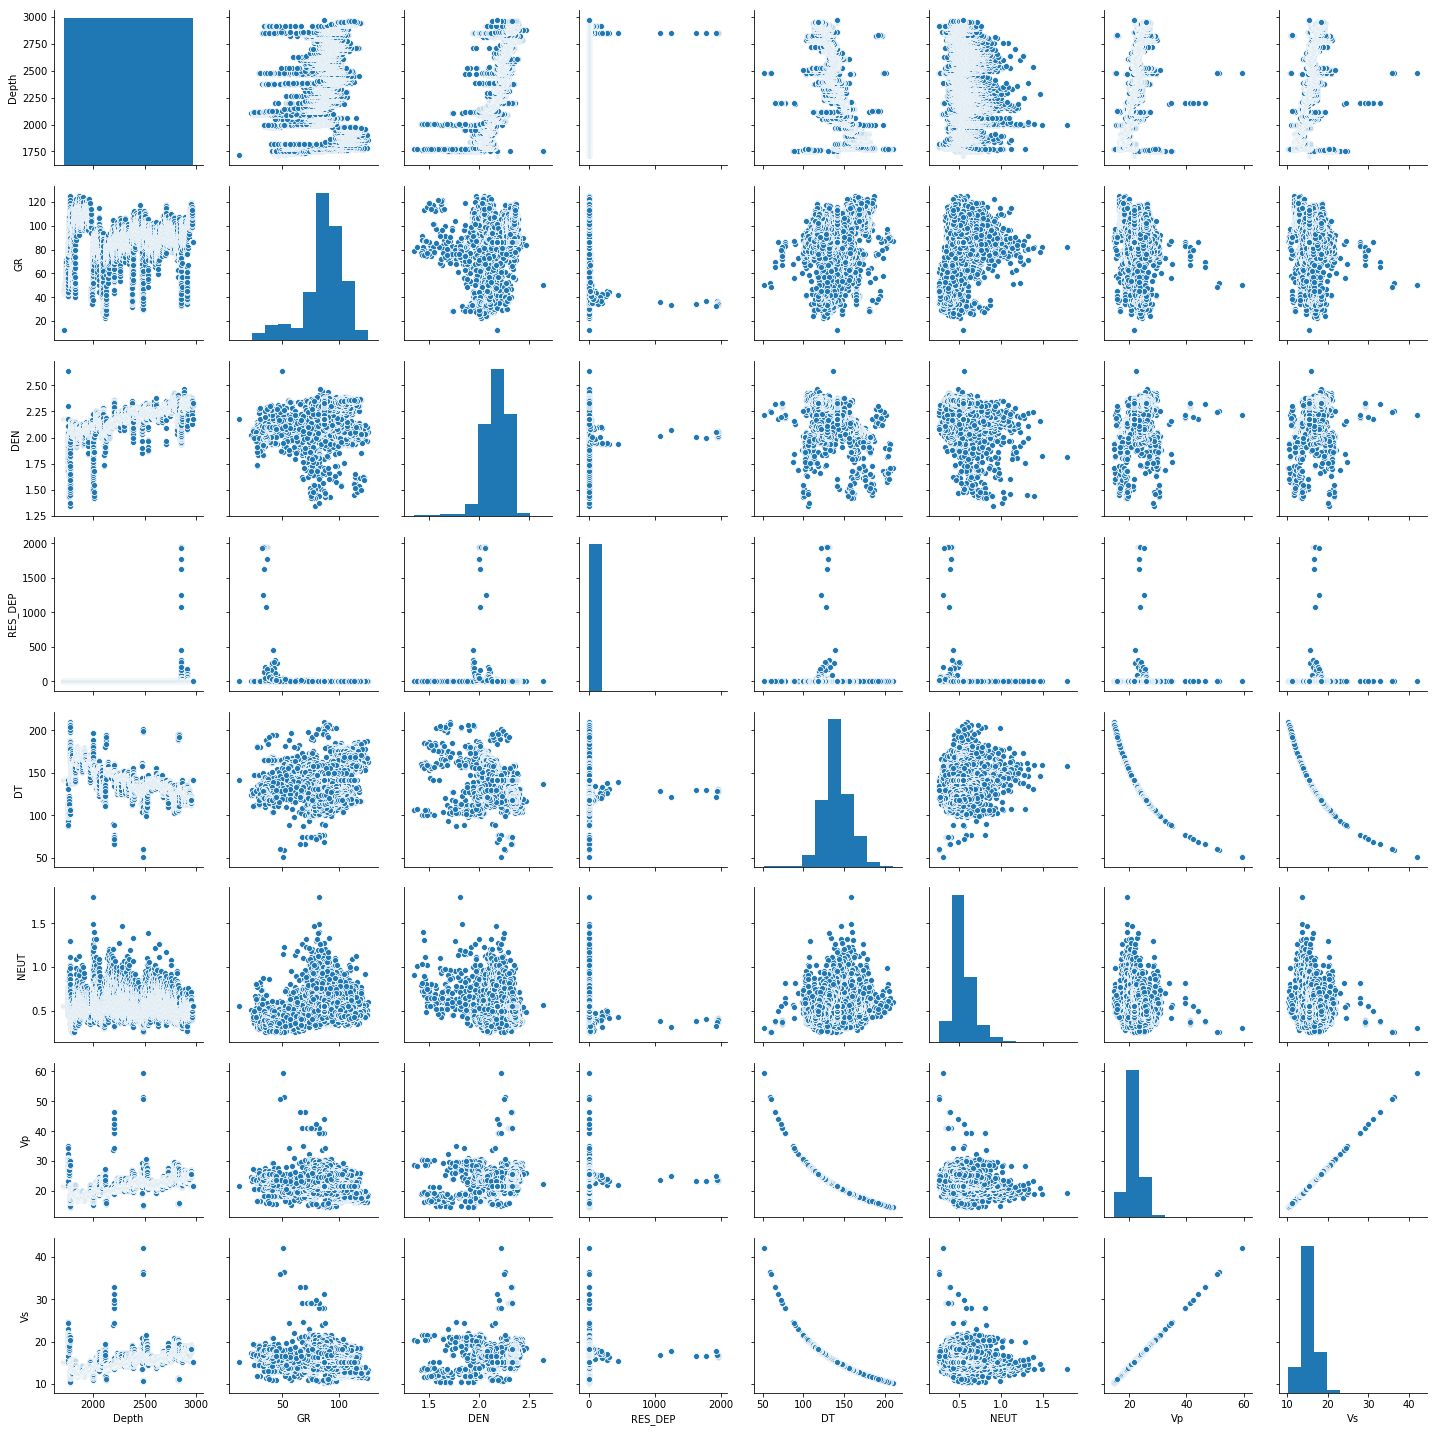

In [46]:
g = sns.pairplot(Well_1)
#g.map_diag(plt.hist)p/7yhg[ ]
#g.map_offdiag(plt.scatter, s=10, color = "y", edgecolor="k", linewidth= 0.5);

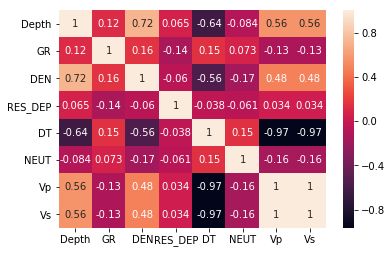

In [47]:
Well_Corr1 = Well_1.corr()
# plot the heatmap and annotation on it
sns.heatmap(Well_Corr1, xticklabels=Well_Corr1.columns, yticklabels=Well_Corr1.columns, annot=True)

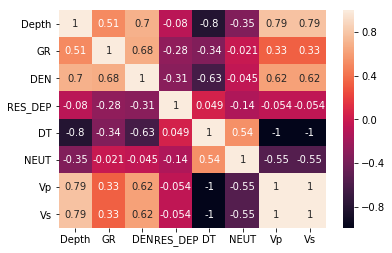

In [48]:
Well_Corr2 = Well_2.corr()
# plot the heatmap and annotation on it
sns.heatmap(Well_Corr2, xticklabels=Well_Corr2.columns, yticklabels=Well_Corr2.columns, annot=True)

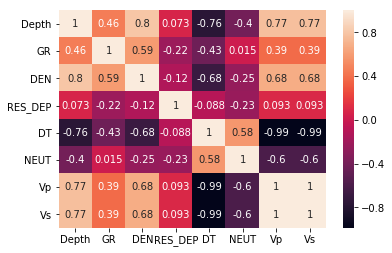

In [49]:
Well_Corr3 = Well_3.corr()
# plot the heatmap and annotation on it
sns.heatmap(Well_Corr3, xticklabels=Well_Corr3.columns, yticklabels=Well_Corr3.columns, annot=True)

In [ ]:
#Well_1['lam'] = br.rockphysics.lam(Well_1['Vp', 'Vs', 'DEN'])

In [50]:
Well_1.describe()

,Depth,GR,DEN,RES_DEP,DT,NEUT,Vp,Vs
count,8214.000000,8214.000000,8214.000000,8214.000000,8214.000000,8214.0000,8214.000000,8214.000000
mean,2342.921400,86.782904,2.174444,4.889347,141.075289,0.5468,21.900009,15.485645
std,361.389456,17.988083,0.122430,75.712913,16.207654,0.1309,2.655901,1.878005
min,1717.090800,12.159700,1.347000,0.093800,51.200001,0.2535,14.528122,10.272933
25%,2030.006100,80.700203,2.104325,0.901425,130.899994,0.4628,20.212201,14.292185
50%,2342.921400,89.145000,2.187000,1.072750,139.199997,0.5236,21.896552,15.483201
75%,2655.836700,97.775078,2.257800,1.313700,150.800003,0.6007,23.284951,16.464947
max,2968.752000,125.198998,2.634200,1950.000000,209.800003,1.7956,59.531249,42.094950


In [ ]:
#wells = pd.DataFrame()

#for i,df in enumerate([ Well_1,Well_2, Well_3]):
    #wells=wells.append(df)   
#wells = wells[['GR', 'RES_DEP', 'DEN', 'wels']]    
#wells.describe(include = 'all')

In [ ]:
fig = plt.figure(figsize=(6,10))

ax0 = fig.add_subplot(121)
ax0.plot(Well_1[Well_1 == 'Well_1', 'GR'], 
         Well_1[Well_1 == 'Well_1', 'DEPTH'],
                                 'gray', alpha=0.6, linewidth = 3, label='original')
#ax0.plot(Well_1[Well_1 == 'Well_1', 'GR_sm'], 
         #Well_1[Well_1 == 'Well_1', 'DEPTH'],
                                 #'k', linewidth = 1, label='smoothed')
ax0.set_xlim([0, 150])
ax0.set_ylim([750, 1650])
ax0.legend( loc='upper left')
ax0.set_title('gamma')
ax0.set_ylabel(r'depth [m]', size=12)
ax0.invert_yaxis()
ax0.set_xlabel(r'GR [API]', size=12)

ax1 = fig.add_subplot(122)
ax1.plot(Well_1[Well_1 == 'Well_1', 'DEN'], 
         Well_1[Well_1 == 'Well_1', 'DEPTH'],
                                 'lightblue', alpha=0.6, linewidth = 3, label='original')
ax1.plot(Well_1[Well_1 == 'Well_1', 'DEN'], 
         Well_1[Well_1 == 'Well_1', 'DEPTH'],
                                 'b', linewidth = 1, label='smoothed')
ax1.set_xlim([2, 3.5])
ax1.set_ylim([750, 1650])
ax1.legend( loc='upper left')
ax1.set_title('')
ax1.set_ylabel('', size=12)
ax1.invert_yaxis()
ax1.set_xlabel(, size=12)

plt.tight_layout()
plt.show()

In [51]:
def well_plot(top_depth, bottom_depth):
    
    logs=Well_1[(Well_1.Depth >= top_depth, ) & (Well_1.Depth <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
#1st track: GR track
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,100)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs.RES_DEP, logs.Depth, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')

In [52]:
well_plot(Well_1.Depth.min(),Well_1.Depth.max())

ValueError: Length of passed values is 1, index implies 8214

No handles with labels found to put in legend.


AttributeError: 'AxesSubplot' object has no attribute 'invert'

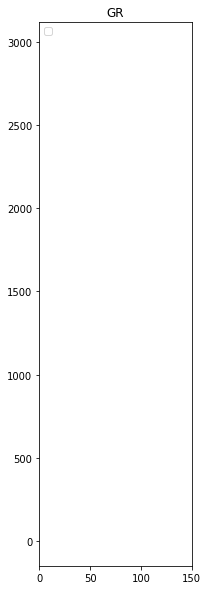

In [55]:
fig = plt.figure(figsize=(6,10))

ax0 = fig.add_subplot(121)
ax0.plot(Well_1)

ax0.set_xlim([0, 150])
ax0.legend( loc='upper left')
ax0.set_title('GR')
ax0.invert()
ax0.set_ylabel('')
ax0.set_xlabel('')